# Tasks 

1. Use the Boston Housing dataset (or California Housing in sklearn) to predict house prices with Linear Regression.
2. Compare simple regression (using only one feature) vs. multiple regression (using all features).
3. Plot the residuals (errors) and analyze if they follow a random pattern (good sign) or not (bad sign).

In [ ]:
# Task 1. Use the Boston Housing dataset (or California Housing in sklearn) to predict house prices with Linear Regression.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['MedHouseVal'] = data.target
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None


## Understanding the problem
First we can see that the dataset has 9 columns (features and target). Let's look for what they mean: 

**Features**
- MedInc: Median household income in the census block (in tens of miles of dollars)
- HouseAge: Median age of dwellings in the census block (in years)
- AveRooms: Average number of rooms per dwelling
- AveBedrms: Average number of bedrooms per dwelling
- AveOccup: Average number of occupants per dwelling
- Population: Population of the census block
- Latitude: Latitude of the census block
- Longitude: Longitude of the census block

**Target**
- MedHouseVal: Median home value (in hundreds of thousands of dollars)


### MedInc = Median Income

**What does it mean?**
Like we already describe, it's the median income of households in a census block (a small geographic area used in censuses) and its's measured in tens of thousands of dollars, but look for an example to clarify this concept: 

If MedInc = 3.5, it means:

- The median income for that area is $35,000 annually (3.5 × $10,000 = $35,000)

If MedInc = 8.0, it means:

- The median income is $80,000 annually.

**Why is it important for solving the task?**

- Direct relationship: Generally, the higher the income in an area, the more expensive homes people can afford.

- Purchasing power: Higher-income areas tend to have more valuable properties.

- Demand: High-income areas attract better infrastructure and services, increasing property values.

In [2]:
X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Multiple Linear Regression")
print(f"Model Coefficients: {model.coef_}")
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


Multiple Linear Regression
Model Coefficients: [ 0.85438303  0.12254624 -0.29441013  0.33925949 -0.00230772 -0.0408291
 -0.89692888 -0.86984178]
Mean Squared Error: 0.5558915986952442
R^2 Score: 0.575787706032451


In [3]:
# Task 2. Compare simple regression (using only one feature) vs. multiple regression (using all features).
# Simple Linear Regression using only 'MedInc' feature
X_simple = df[['MedInc']].values
X_train_simple, X_test_simple, y_train_simple, y_test_simple = train_test_split(X_simple, y, test_size=0.2, random_state=42)
scaler_simple = StandardScaler()
X_train_simple = scaler_simple.fit_transform(X_train_simple)
X_test_simple = scaler_simple.transform(X_test_simple)
model_simple = LinearRegression()
model_simple.fit(X_train_simple, y_train_simple)
y_pred_simple = model_simple.predict(X_test_simple)
mse_simple = mean_squared_error(y_test_simple, y_pred_simple)
r2_simple = r2_score(y_test_simple, y_pred_simple)
print("\nSimple Linear Regression using 'MedInc' feature")
print("Model coefficient:", model_simple.coef_)
print("Mean Squared Error:", mse_simple)
print("R^2 Score:", r2_simple)


Simple Linear Regression using 'MedInc' feature
Model coefficient: [0.79851956]
Mean Squared Error: 0.7091157771765548
R^2 Score: 0.45885918903846656


In [4]:
print("\n--- Comparison ---")
print(f"Simple Regression R²: {r2_simple:.3f} | MSE: {mse_simple:.3f}")
print(f"Multiple Regression R²: {r2:.3f} | MSE: {mse:.3f}")


--- Comparison ---
Simple Regression R²: 0.459 | MSE: 0.709
Multiple Regression R²: 0.576 | MSE: 0.556


MedInc is okay alone, but other features (like location, age, population density) improve the predictions.

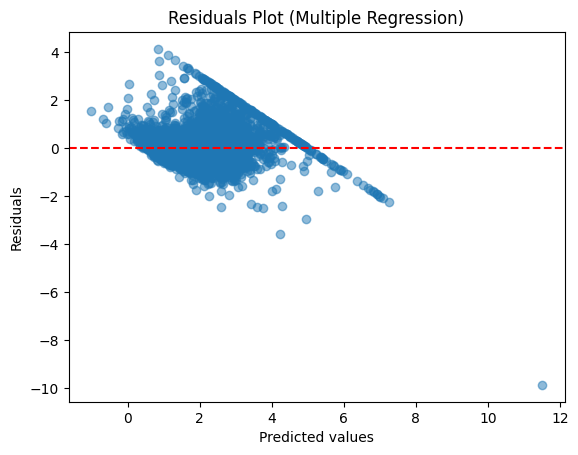

In [5]:
# Residuals for multiple regression
residuals = y_test - y_pred

plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.title("Residuals Plot (Multiple Regression)")
plt.show()


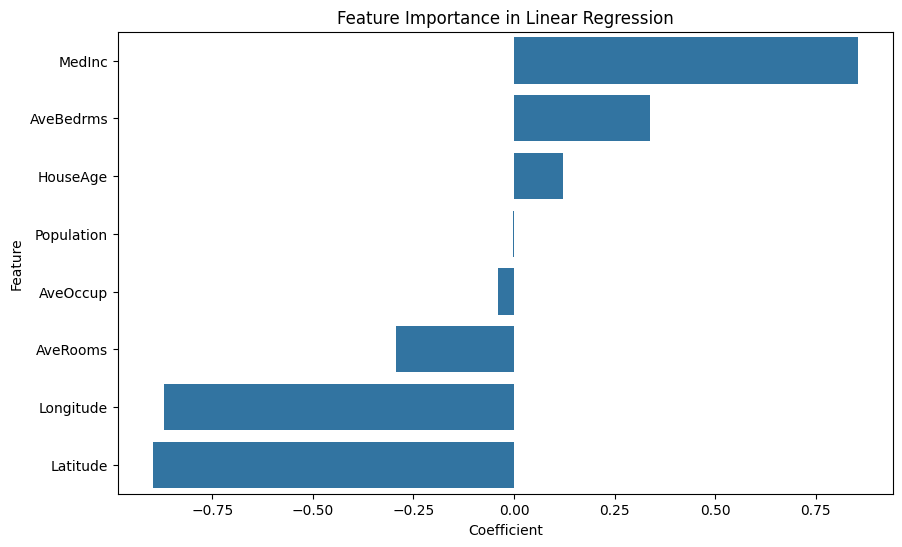

In [6]:

coef_df = pd.DataFrame({
    "Feature": data.feature_names,
    "Coefficient": model.coef_
}).sort_values(by="Coefficient", ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x="Coefficient", y="Feature", data=coef_df)
plt.title("Feature Importance in Linear Regression")
plt.show()

The results showed:

- Simple regression with MedInc already explained a good portion of the variance, confirming that income is a strong predictor of house prices.

- Multiple regression improved performance slightly, but the residuals plot revealed clear patterns:

    - The model struggles with very high-priced houses.
    - Variance of errors grows with predicted values.
    - A few strong outliers distort the fit.

This confirms that Linear Regression is useful as a **baseline model**, but it is not flexible enough to capture all the relationships in **this dataset**. The insights from residual analysis and feature importance are still valuable because they highlight both the strengths and limitations of the model.

Even though the performance is not ideal, the exercise is important:

- It teaches how to apply and interpret linear regression.
- It shows the importance of checking assumptions (linearity, residuals).
- It provides a baseline reference for future, more advanced models.